# Lista 1

**Przesyłam całą listę w nowym pliku, bardziej czytalnym. Możliwe, że sprawdzał Pan plik z poprzedniego tygodnia - tutaj mam dołożone dokończenie zadania 3 (van der Corput) i zadanie 4 (dodatkowe)**

In [1]:
import numpy as np, math, random, matplotlib.pyplot as plt, time

In [6]:
# funkcje pomocnicze

def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n

def drewdemp(X):
    X.append(1)
    # X.append(math.sqrt(len(X)))
    # X.append(-math.sqrt(len(X)))
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    plt.plot(x_values, y_values)
    plt.title('Wykres dystrybuanty empirycznej')
    plt.show()

In [48]:
X = [random.random() for _ in range(100)] # jednostajny
F = [np.random.randn() for _ in range(100)] # normalny standardowy
# drewdemp(X)

In [46]:
# drewdemp(F)

## zadanie 1

Generatory LCG liczb pseudolosowych 

Napisz program generujący liczby
pseudolosowe używając algorytmu Minimal Standard LCG. Sprawdź, że liczby z wygenerowanego ciągu próbkowane z odpowiednio dużym odstępem, mając cechy ciągu iid zmiennych losowych o rozkładzie jednostajnym.

In [15]:
def lcg(x0=1,n=100,a=69069,c=5,m=2**32-1):
    x=[]
    x.append(x0)
    for i in range(1,n):
        x.append((a*x[i-1]+c)%(m))
    return [xi/m for xi in x]

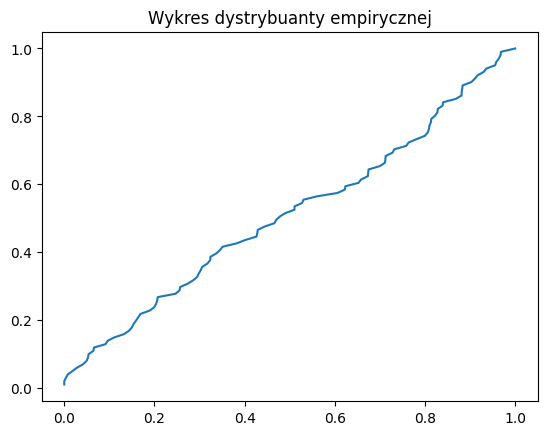

In [16]:
drewdemp(lcg())

## zadanie 2

Ciągi kwazilosowe Napisz własny algorytm generujący liczby kwazilosowe z ciągu van der Corputa. Ciąg van der Corputa dla bazy b obliczamy nastepująco: dla każdej z liczb {0, 1, 2, . . . , n} przedstawiamy ją w bazie b, następnie odwracamy jej cyfry i dopisujemy z przodu 0.. Np. z liczby 4210 otrzymujemy 0.2410 = 24/100, dla liczby 10112 = 1110 otrzymujemy 0.11012 = 13/16. Powtórz dla tego ciągu analizę z zad. 1.


In [102]:
def vanDerCorput(x, baza=2):
    # na potrzeby zadania założenie, że podajemy liczby 
    # w systemie dziesiętnym (korzystam potem z range)
    new = []
    for i in range(0,x+1):
        ne = np.base_repr(i, baza)[::-1]
        if baza == 10:
            new.append(float('0.'+ne))
        else: # zmienia ułamek binarny/inny na dziesiętny
            new.append(sum(int(bit, baza) * baza ** -(i + 1) for i, bit in enumerate(ne)))
    return new

In [19]:
print(vanDerCorput(24,10))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 0.02, 0.12, 0.22, 0.32, 0.42]


In [20]:
print(vanDerCorput(11,2))

[0.0, 0.5, 0.25, 0.75, 0.125, 0.625, 0.375, 0.875, 0.0625, 0.5625, 0.3125, 0.8125]


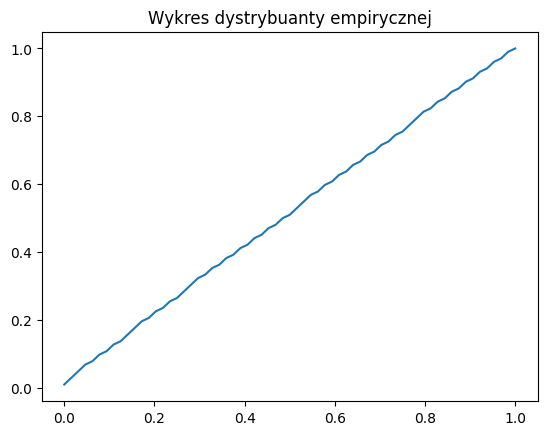

In [23]:
drewdemp(vanDerCorput(100,2))

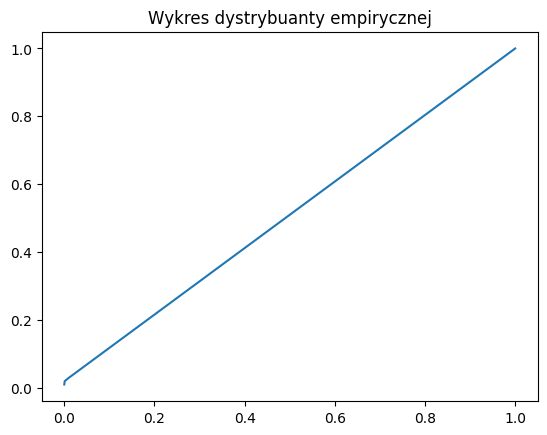

In [24]:
drewdemp(vanDerCorput(100,10))

## zadanie 3

Szacowanie liczby π 

Oszacuj liczbę π, korzystając z faktu, że jeżeli wybierzemy punkt (x, y) z kwadratu jednostkowego [0, 1] × [0, 1], to mamy szansę π/4, że będzie w odległości mniejszej niż 1 od punktu (0, 0). Sprawdź, jak dobre jest to oszacowanie dla n punktów wygenerowanych przy użyciu:
- liczb pseudolosowych z minimal standard LCG,
- liczb kwazilosowych z ciągu Haltona, tj. pary ciągów van der Corputa o
bazach względnie pierwszych,
- liczb wybieranych równomiernie z kwadratu, tj. o kolejnych współrzędnych różniących się 1/√n.

Jaki rozkład mają błędy w oszacowaniu πˆn − π dla dużych n?

In [88]:
# zmieniona funkcja lcg, tak aby losowała tablicę krotek (współrzędne x i y)

def lcg2(x0=(0.01,0.011),n=10**5,a=69069,c=5,m=2**32):
    x=[]
    x.append(x0)
    for i in range(1,n):
        x.append([(a*x[i-1][0]+c)%(m),(a*x[i-1][1]+c)%(m)])
    return [(xi[0]/m,xi[1]/m) for xi in x]

In [110]:
# jeszcze nie dokończone

def pierwiastki(n):
    xs = [i/math.sqrt(n) for i in range(1,n+1)]
    # print(xs)
    ys = [i/math.sqrt(n) for i in range(1,n+1)]
    # print(ys)
    D = [[xs[i], ys[i]] for i in range(n)]
    return D

In [112]:
def pi(n,X):
    count = sum(1 for xi in X[0:n] if (xi[0]**2+xi[1]**2<1))
    return(4*count/n)

def por(n=10**5):
    xs = range(100, 10000, 500)
    # czas1 = time.time()
    X = np.random.rand(n,2)
    ys = [pi(i,X) for i in xs]
    # czas1 = time.time()-czas1
    # czas2 = time.time()
    Y = lcg2((0.01,0.011), n)
    yss = [pi(i,Y) for i in xs]
    # yss = []
    # czas2 = time.time()-czas2
    # czas3 = time.time()
    Zx = vanDerCorput(n, 2)
    Zy = vanDerCorput(n, 3)
    Z = [[Zx[i], Zy[i]] for i in range(n)]
    ysss = [pi(i,Z) for i in xs]
    # czas3 = time.time()-czas3
    # czas4 = time.time()
    D = pierwiastki(n)
    yssss = [pi(i,D) for i in xs]
    # czas4 = time.time()-czas4
    # for i in xs:
    #     ys.append(pi(i,X))
        # yss.append(pi(i,Y))
        # ysss.append(pi(i,Z))
    #     yssss.append(pi(i,D))
    # wykres przybliżenia pi w zależności od n
    plt.plot(xs,ys, label='jednorodny')
    plt.plot(xs, yss, label='lcg')
    plt.plot(xs, ysss, label = 'vandercorput')
    # plt.plot(xs,yssss, label = 'pierwiastki')
    plt.plot(xs, [math.pi for _ in xs], label = 'pi')
    plt.ylim(3.0, 3.25)
    plt.legend()
    plt.show()
    # print(czas1,czas2,czas3,czas4)

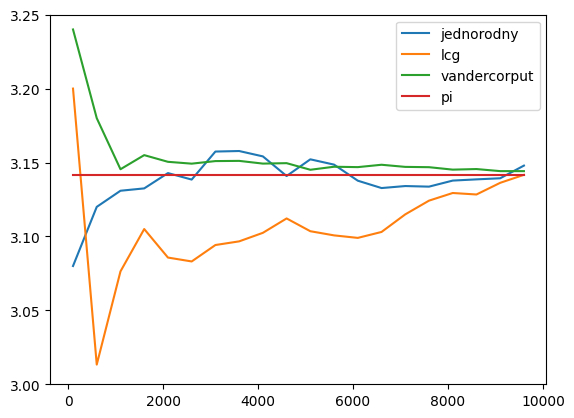

In [94]:
por()

## zadanie 4 - dodatkowe

Igła Buffona 

Przeprowadź symulację eksperymentu igły Buffona, polegającego na rzucaniu z dużej wysokości igły długości l na podłogę i zliczaniu, jak często przetnie ona brzegi poziomych pasów o szerokości 1.

* Z jakiego rozkładu należy losować leżące na ziemi igły? Zasymuluj pojedynczy rzut.
* Wiedząc, że prawdopodobieństwo przecięcia brzegu pasa wynosi 2l/π dla l < 1 (dlaczego tyle?) zaimplementuj alternatywny algorytm szacowania liczby π.

In [26]:
def rzut(l):
    x = random.random() # odległość końca igły od bliższej linii
    fi = random.uniform(0, math.pi/2)
    return (x<l*math.cos(fi))

def szacowaniePi(l,n):
    p = sum(rzut(l) for i in range(n))/n
    return 2*l/p


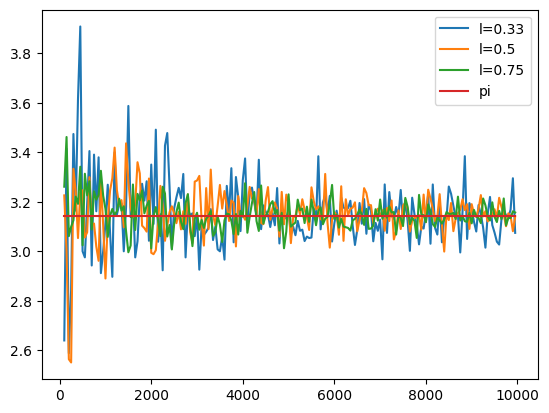

In [31]:
xs = range(100, 10000, 50)
ys = [szacowaniePi(0.33,i) for i in xs]
yss = [szacowaniePi(0.5,i) for i in xs]
ysss = [szacowaniePi(0.75,i) for i in xs]

plt.plot(xs, ys, label = 'l=0.33')
plt.plot(xs, yss, label = 'l=0.5')
plt.plot(xs, ysss, label = 'l=0.75')
plt.plot(xs, [math.pi for _ in xs], label = 'pi')
plt.legend()
plt.show()

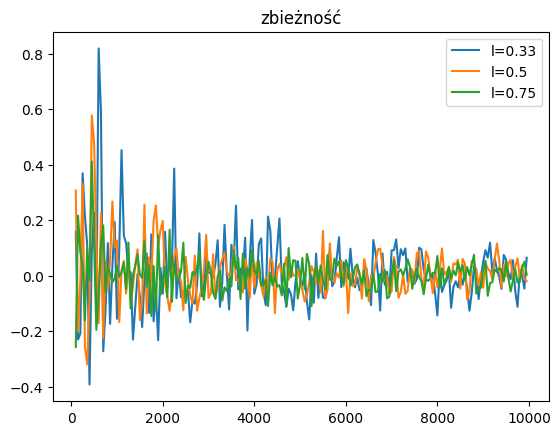

In [33]:
# zbieżność
Ys = [szacowaniePi(0.33,i)-math.pi for i in xs]
Yss = [szacowaniePi(0.5,i)-math.pi for i in xs]
Ysss = [szacowaniePi(0.75,i)-math.pi for i in xs]

plt.plot(xs, Ys, label = 'l=0.33')
plt.plot(xs, Yss, label = 'l=0.5')
plt.plot(xs, Ysss, label = 'l=0.75')
plt.legend()
plt.title('zbieżność')
plt.show()


In [123]:
def porr(n=10**4):
    xs = range(100, n, 400)
    X = np.random.rand(n,2)
    ys = [pi(i,X) for i in xs]
    Y = lcg2((0.01,0.011), n)
    yss = [pi(i,Y) for i in xs]
    Zx = vanDerCorput(n, 2)
    Zy = vanDerCorput(n, 3)
    Z = [[Zx[i], Zy[i]] for i in range(n)]
    ysss = [pi(i,Z) for i in xs]
    # D = pierwiastki(n)
    # yssss = [pi(i,D) for i in xs]
    ysssss = [szacowaniePi(0.75,i) for i in xs]
    # wykres przybliżenia pi w zależności od n
    plt.plot(xs,ys, label='jednorodny')
    plt.plot(xs, yss, label='lcg')
    plt.plot(xs, ysss, label = 'vandercorput')
    # plt.plot(xs,yssss, label = 'pierwiastki')
    plt.plot(xs, ysssss, label = 'igła')
    plt.plot(xs, [math.pi for _ in xs], label = 'pi')
    plt.ylim(3.0,3.3)
    plt.legend()
    plt.show()

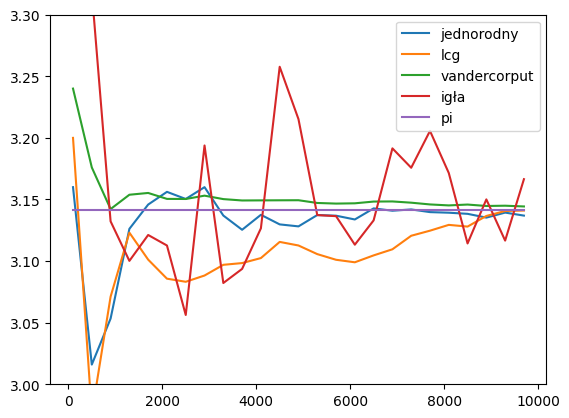

In [124]:
porr()

In [125]:
# porównanie czasowe algorytmów